In [40]:
from ROOT import TFile
import numpy as np
from Plotter.PlotterTools.Kinematics import Kinematics
from Plotter.PlotterTools.ObsAndExp import ObsAndExp
from Conversion.measConvSF import get_conv_sf

In [15]:
def get_hist(sample, histkey, channel, region, mass_point, syst="Central"):
    if sample == "fake":
        fkey = f"Outputs/{channel}/{mass_point}/DATA.root"
    else:
        fkey = f"Outputs/{channel}/{mass_point}/{sample}.root"
    histkey = f"{sample}/{region}/{syst}/{histkey}"
    
    f = TFile.Open(fkey)
    h = f.Get(histkey)
    h.SetDirectory(0)
    f.Close()

    return h

In [38]:
histkey = "score_others"
channel = "1E2Mu"
region = "SR"

mass_point = "MHc130_MA90"
signal = f"TTToHcToWA_AToMuMu_{mass_point}"
prompts = ['rare', 'ttX', 'VV']

h_signal = get_hist(signal, histkey, channel, region, mass_point)

signals = dict()
signals[mass_point] = h_signal
hists = dict()

# data
h_data = get_hist("DATA", histkey, channel, region, mass_point)

# estimate systematics for fake
h_fake = get_hist("fake", histkey, channel, region, mass_point)
h_fake_up = get_hist("fake", histkey, channel, region, mass_point, syst="Up")
h_fake_down = get_hist("fake", histkey, channel, region, mass_point, syst="Down")

for bin in range(h_fake.GetNbinsX()+1):
    center = h_fake.GetBinContent(bin)
    upper = h_fake_up.GetBinContent(bin) - center
    lower = center - h_fake_down.GetBinContent(bin)
    error = np.sqrt(np.power(upper, 2) + np.power(lower, 2))
    h_fake.SetBinError(bin, error)
hists['fake'] = h_fake

try:
    h_DY = get_hist("DY", histkey, channel, region, mass_point)
    DY_sf, DY_err = get_conv_sf(channel, "DY")
    for bin in range(h_DY.GetNbinsX()+1):
        center = h_DY.GetBinContent(bin) * DY_sf
        upper = h_DY.GetBinContent(bin) * (DY_sf + DY_err) - center
        lower = center - h_DY.GetBinContent(bin) * (DY_sf - DY_err) 
        err = np.sqrt(np.power(upper, 2) + np.power(lower, 2))
        h_DY.SetBinContent(bin, center)
        h_DY.SetBinError(bin, err)
except:
    h_DY = None

if h_DY:        
    h_conv = h_DY.Clone("conv")
else:
    h_conv = None

try:
    h_ZG = get_hist("ZG", histkey, channel, region, mass_point)
    ZG_sf, ZG_err = get_conv_sf(channel, "ZG")
    for bin in range(h_ZG.GetNbinsX()+1):
        center = h_ZG.GetBinContent(bin) * ZG_sf
        upper = h_ZG.GetBinContent(bin) * (ZG_sf + ZG_err) - center
        lower = center - h_ZG.GetBinContent(bin) * (ZG_sf - ZG_err)
        err = np.sqrt(np.power(upper, 2) + np.power(lower, 2))
        h_ZG.SetBinContent(bin, center)
        h_ZG.SetBinError(bin, err)
except:
    h_ZG = None

if h_ZG:
    if h_conv:
        h_conv.Add(h_ZG)
    else:
        h_conv = h_ZG.Clone("conv")
    hists['conv'] = h_conv
else:
    pass

for prompt in prompts:
    hists[prompt] = get_hist(prompt, histkey, channel, region, mass_point)

INFO: Storing histograms...
INFO: Histograms will be automatically normalized
INFO: Automatically set y axis range


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


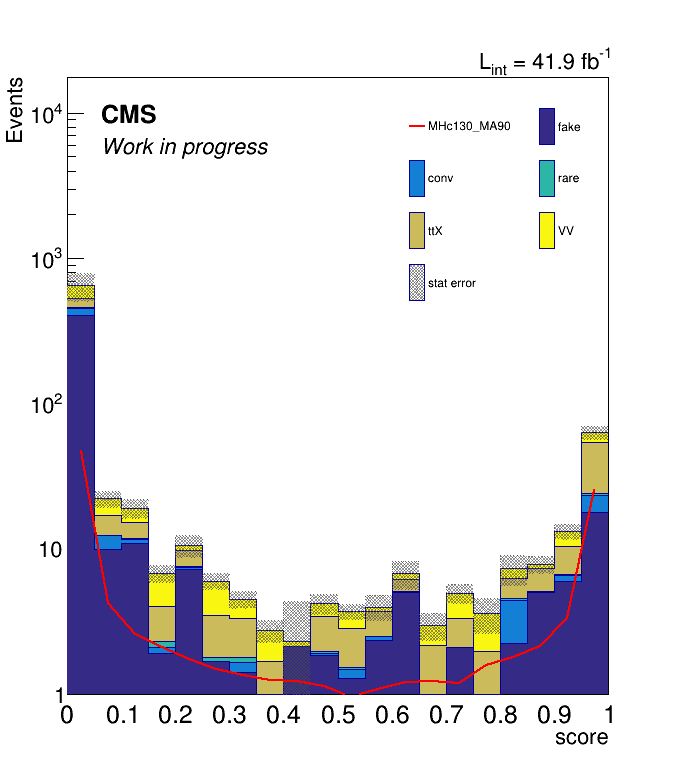

In [39]:
cvs_params = {
    "logy": True,
    "grid": False
}
info_params = {
    "info": "L_{int} = 41.9 fb^{-1}",
    "cms_text": "CMS",
    "extra_text": "Work in progress"
}
hist_params = {
    "x_title": "score",
    "x_range": [0., 1.],
    "ratio_range": [0., 2.],
    "rebin": 5,
    "y_title": "Events",
}

plotter = Kinematics(cvs_params, hist_params, info_params)
plotter.get_hists(signals, hists)
plotter.combine()
plotter.draw()

INFO: Storing histograms...
INFO: y axis range set to be maximum of data plot


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


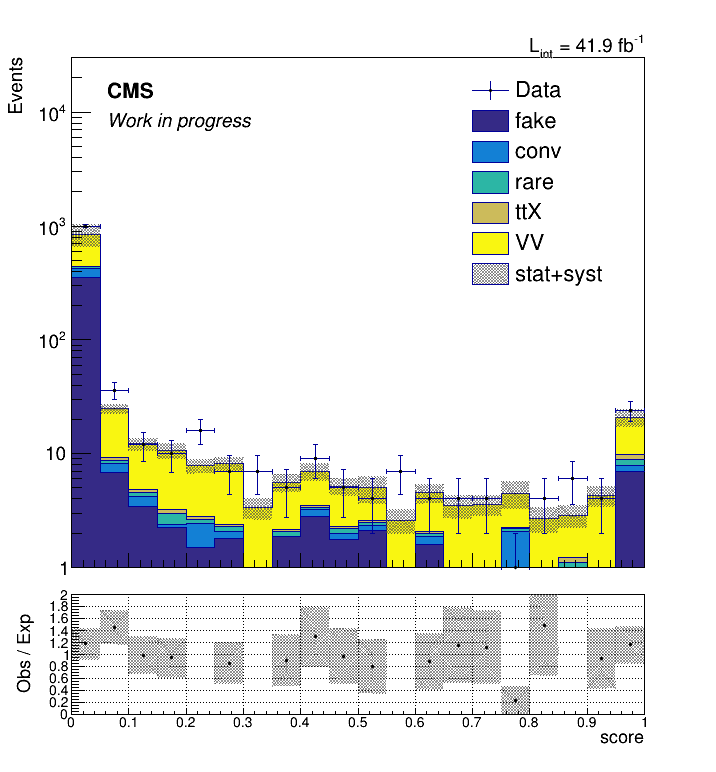

In [34]:
cvs_params = {
    "logy": True,
    "grid": False
}
info_params = {
    "info": "L_{int} = 41.9 fb^{-1}",
    "cms_text": "CMS",
    "extra_text": "Work in progress"
}
hist_params = {
    "x_title": "score",
    "x_range": [0., 1.],
    "ratio_range": [0., 2.],
    "rebin": 5,
    "y_title": "Events",
}

plotter = ObsAndExp(cvs_params, hist_params, info_params)
plotter.get_hists(h_data, hists)
plotter.combine()
plotter.draw()